<a href="https://www.kaggle.com/code/sootooly/aviation-accidents?scriptVersionId=130314702" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/kaggle/input/aviation-accidents-aviation-safety-network-dataset/aviation-accident-data-2023-05-16.csv'

In [102]:
df = pd.read_csv(file_path, parse_dates=True).dropna()
df = df.loc[(df.date != 'date unk.') & (df.year != 'unknown')]
df

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


# Accidents by year

<AxesSubplot: title={'center': 'Aviation Accidents'}, xlabel='Year', ylabel='Count'>

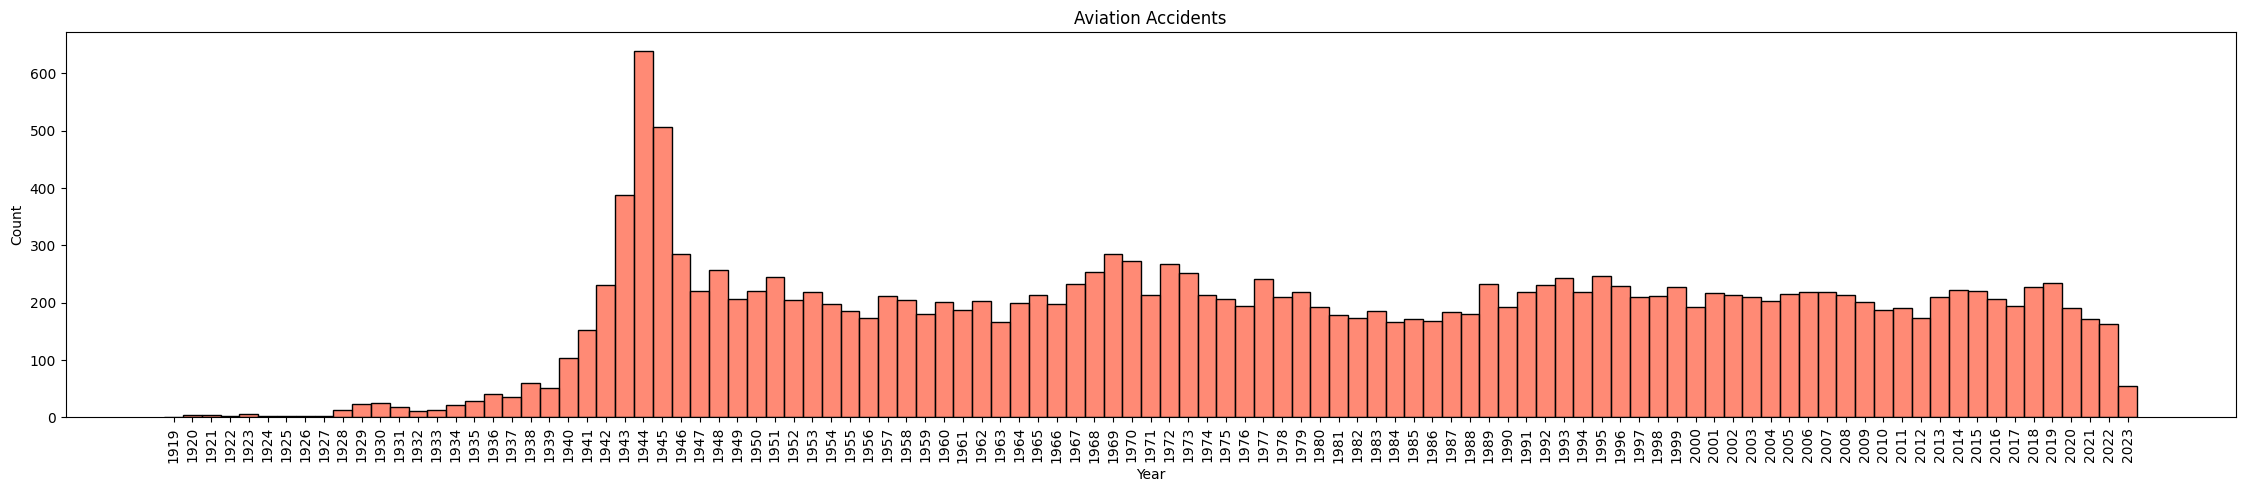

In [103]:
plt.figure(figsize=(28, 5))
plt.xticks(rotation=90)
plt.title('Aviation Accidents')
plt.ylabel('Count')
plt.xlabel('Year')
count_year = df.groupby('year').year.count()
sns.histplot(x=df.year, color='tomato')

# Fatalities by year

/tmp/ipykernel_35/382864337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'] = df['fatalities'].astype('int64')


Text(0.5, 0, 'Year')

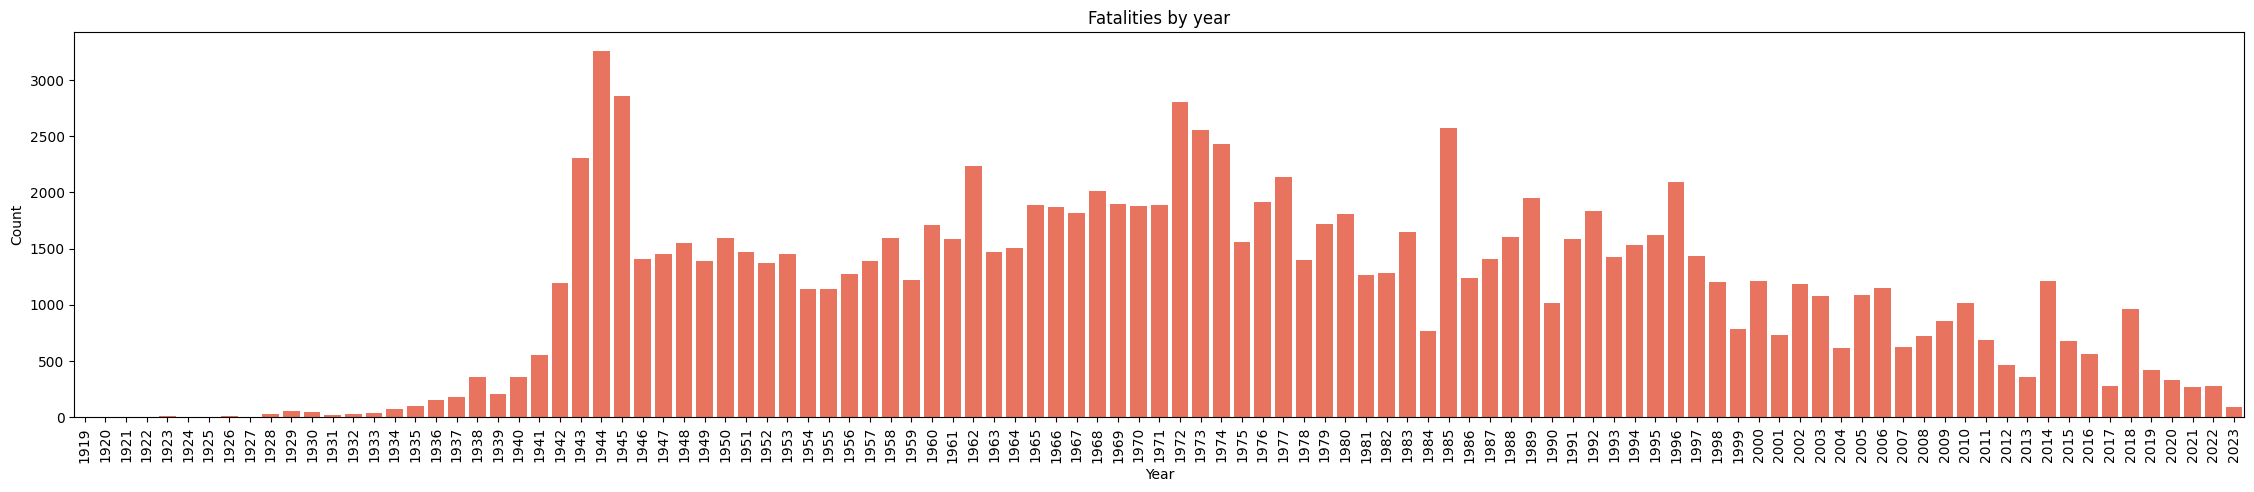

In [104]:
def check_fatal(value):
    if '+' in str(value):
        return False
    else:
        return True

df = df.loc[df['fatalities'].map(check_fatal)]
df['fatalities'] = df['fatalities'].astype('int64')
fatal_year = df.groupby('year').fatalities.sum()

plt.figure(figsize=(28, 5))
plt.xticks(rotation=90)

sns.barplot(x=fatal_year.index, y=fatal_year, color='tomato')

plt.title('Fatalities by year')
plt.ylabel('Count')
plt.xlabel('Year')

Text(0.5, 1.0, 'Aviation accidents by country (1919-2023)')

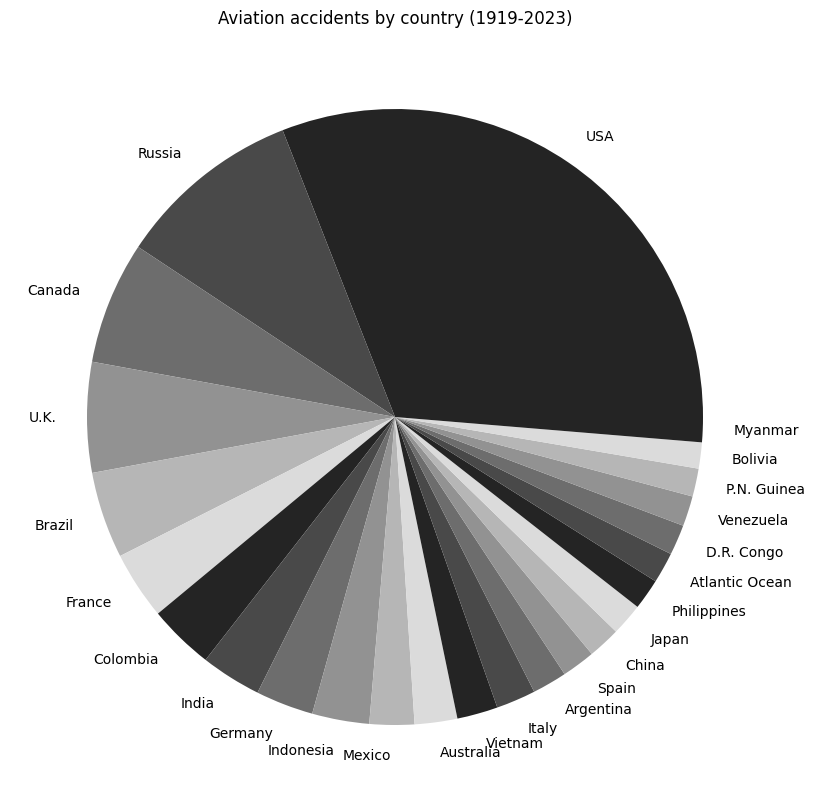

In [125]:
count_country = df.groupby('country')['country'].count().sort_values(ascending=False)[:25]

plt.figure(figsize=(10, 10))
plt.pie(x=count_country, labels=count_country.index, colors=sns.color_palette('gray'))
plt.title('Aviation accidents by country (1919-2023)')

# Boeing accidents

In [106]:
def check_boeing(row):
    if 'boeing' in str(row.type).lower():
        return True
    else:
        return False
df.loc[df.apply(check_boeing, axis='columns')]['type'].value_counts()[:15]

Boeing KC-135A                   51
Boeing 737-2A8                   18
Boeing 707-321C                  17
Boeing 737-8AS (WL)              15
Boeing KC-97G Stratofreighter    15
Boeing 377 Stratocruiser         12
Boeing 707-321B                  12
Boeing 737-4Y0                   12
Boeing B-17G                     10
Boeing 707-323C                  10
Boeing 737-4Q8                    9
Boeing 737-823 (WL)               9
Boeing 720-023B                   9
Boeing 737-7H4 (WL)               8
Boeing 747-121                    8
Name: type, dtype: int64

# Fatalities / accident ratio

Text(0, 0.5, '')

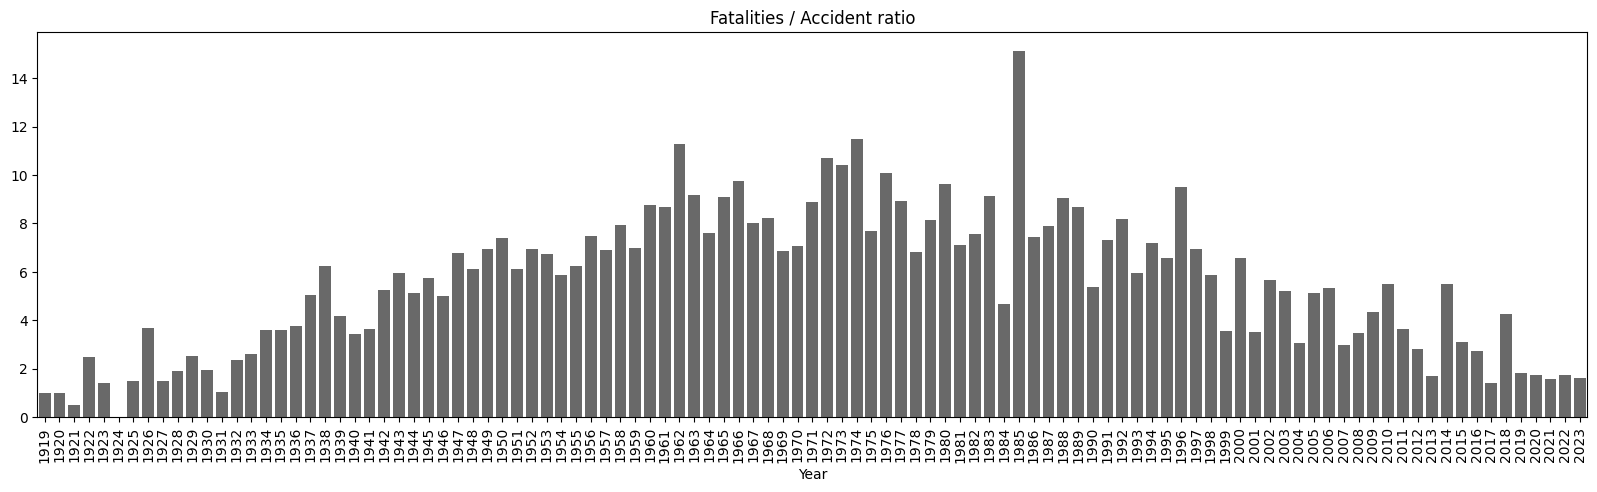

In [107]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)

fatalities_per_accident = df.groupby('year').fatalities.sum() / df.groupby('year').fatalities.count()
sns.barplot(x=fatalities_per_accident.index, y=fatalities_per_accident, color='dimgray')

plt.title('Fatalities / Accident ratio')
plt.xlabel('Year')
plt.ylabel('')

# Accidents by season 

Text(0.5, 0, 'Season')

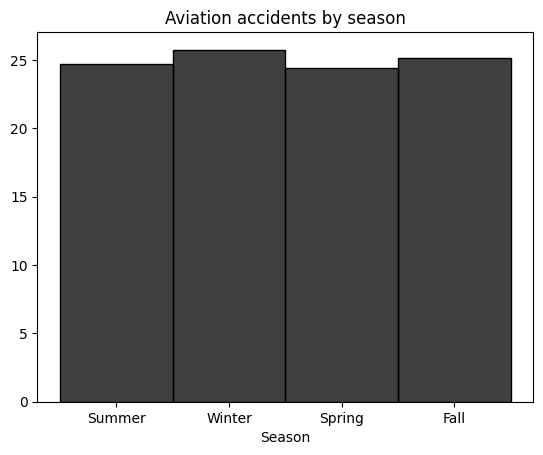

In [130]:
def check_season(value):
    if ('JAN' in str(value)) | ('FEB' in str(value)) | ('DEC' in str(value)):
        return 'Winter'
    elif ('MAR' in str(value)) | ('APR' in str(value)) | ('MAY' in str(value)):
        return 'Spring'
    elif ('AUG' in str(value)) | ('JUN' in str(value)) | ('JUL' in str(value)):
        return 'Summer'
    elif ('SEP' in str(value)) | ('OCT' in str(value)) | ('NOV' in str(value)):
        return 'Fall'

seasons = df['date'].map(check_season)
seasons.name = 'season'
df1 = df.join(seasons)
sns.histplot(data=df1['season'], color='black', stat='percent')
plt.title('Aviation accidents by season')
plt.ylabel('')
plt.xlabel('Season')